In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

# 读取数据
# df = pd.read_csv('/path/to/your/data.csv')

# 设定k-mer大小
k = 3
n = 50

def kmerize(seq, k):
    """将序列分解为k-mer列表。"""
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

# 创建一个CountVectorizer实例，用于计算k-mer频率
vectorizer = CountVectorizer(analyzer=lambda x: kmerize(x, k))

# 定义聚类结果的DataFrame
cluster_results = pd.DataFrame()

# 对每个VJ组进行迭代
for name, group in df.groupby('group_vj'):
    if len(group) < n:
        # 如果样本数量少于n，为所有样本赋予相同的默认聚类标签
        group['cluster_label'] = 0
    else:   
        # 计算每个CDR3序列的k-mer频率矩阵
        kmer_matrix = vectorizer.fit_transform(group['cdr3_aa'])

        # 计算余弦相似度矩阵
        cosine_dist = 1 - cosine_similarity(kmer_matrix)

        # 应用层次聚类算法
        clustering = AgglomerativeClustering(n_clusters=n, affinity='precomputed', linkage='complete')
        labels = clustering.fit_predict(cosine_dist)

        # 将聚类结果添加到group DataFrame中
        group['cluster'] = labels

        # 合并聚类结果到主DataFrame中
        cluster_results = pd.concat([cluster_results, group])


# 输出包含聚类标签的完整DataFrame
print(cluster_results.head())

# 保存结果
# cluster_results.to_csv('/path/to/your/output.csv', index=False)


IGHV1-18&IGHJ3  finished!
IGHV1-18&IGHJ4  finished!
IGHV1-18&IGHJ5  finished!
IGHV1-18&IGHJ6  finished!
IGHV1-2&IGHJ1  finished!
IGHV1-2&IGHJ3  finished!
IGHV1-2&IGHJ4  finished!
IGHV1-2&IGHJ5  finished!
IGHV1-2&IGHJ6  finished!
IGHV1-24&IGHJ3  finished!
IGHV1-24&IGHJ4  finished!
IGHV1-24&IGHJ5  finished!
IGHV1-24&IGHJ6  finished!
IGHV1-3&IGHJ3  finished!
IGHV1-3&IGHJ4  finished!
IGHV1-3&IGHJ5  finished!
IGHV1-3&IGHJ6  finished!
IGHV1-46&IGHJ3  finished!
IGHV1-46&IGHJ4  finished!
IGHV1-46&IGHJ5  finished!
IGHV1-46&IGHJ6  finished!
IGHV1-58&IGHJ4  finished!
IGHV1-69&IGHJ3  finished!
IGHV1-69&IGHJ4  finished!
IGHV1-69&IGHJ5  finished!
IGHV1-69&IGHJ6  finished!
IGHV1-69D&IGHJ3  finished!
IGHV1-69D&IGHJ4  finished!
IGHV1-69D&IGHJ5  finished!
IGHV1-69D&IGHJ6  finished!
IGHV1-8&IGHJ3  finished!
IGHV1-8&IGHJ4  finished!
IGHV1-8&IGHJ5  finished!
IGHV1-8&IGHJ6  finished!
IGHV2-26&IGHJ4  finished!
IGHV2-26&IGHJ6  finished!
IGHV2-5&IGHJ3  finished!
IGHV2-5&IGHJ4  finished!
IGHV2-5&IGHJ5  finished

In [63]:
cluster_results['cluster_label'] = cluster_results.apply(lambda x: f"{x['group_vj']}_{x['cluster']}", axis=1)

In [187]:
cluster_results.loc[cluster_results['group_vj']=='IGHV1-3&IGHJ4']['cluster_label'].value_counts()

IGHV1-3&IGHJ4_2     156
IGHV1-3&IGHJ4_4      85
IGHV1-3&IGHJ4_11     64
IGHV1-3&IGHJ4_18     50
IGHV1-3&IGHJ4_15     36
IGHV1-3&IGHJ4_17     35
IGHV1-3&IGHJ4_41     31
IGHV1-3&IGHJ4_1      29
IGHV1-3&IGHJ4_3      27
IGHV1-3&IGHJ4_7      23
IGHV1-3&IGHJ4_21     22
IGHV1-3&IGHJ4_19     20
IGHV1-3&IGHJ4_37     20
IGHV1-3&IGHJ4_38     17
IGHV1-3&IGHJ4_8      15
IGHV1-3&IGHJ4_20     14
IGHV1-3&IGHJ4_42     14
IGHV1-3&IGHJ4_36     13
IGHV1-3&IGHJ4_14     11
IGHV1-3&IGHJ4_13     10
IGHV1-3&IGHJ4_45      9
IGHV1-3&IGHJ4_6       9
IGHV1-3&IGHJ4_26      8
IGHV1-3&IGHJ4_39      8
IGHV1-3&IGHJ4_0       8
IGHV1-3&IGHJ4_10      8
IGHV1-3&IGHJ4_22      7
IGHV1-3&IGHJ4_27      7
IGHV1-3&IGHJ4_40      7
IGHV1-3&IGHJ4_44      6
IGHV1-3&IGHJ4_33      6
IGHV1-3&IGHJ4_23      6
IGHV1-3&IGHJ4_29      6
IGHV1-3&IGHJ4_12      5
IGHV1-3&IGHJ4_48      5
IGHV1-3&IGHJ4_5       4
IGHV1-3&IGHJ4_9       4
IGHV1-3&IGHJ4_47      4
IGHV1-3&IGHJ4_32      3
IGHV1-3&IGHJ4_46      3
IGHV1-3&IGHJ4_43      3
IGHV1-3&IGHJ4_35

In [65]:
cluster_results.loc[cluster_results['cluster_label']=='IGHV3-23&IGHJ4_0']

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,cancer type,data source,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj,cluster,cluster_label
521,IGH,1,0.000169,TGTGCGAAATGGGTGAGGTACCAATATTGTAGTAGTACCAGCTGCT...,CAKWVRYQYCSSTSCFNW,IGHV3-23,IGHD2-2,IGHJ4,/,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD2-2&IGHJ4,0.000004,0.003658,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
721,IGH,1,0.000169,TGTGCGAAAGAGTGGTACGTTTGGGGGAGTTATCGTTATGGGTCCG...,CAKEWYVWGSYRYGSDSPRPFDYW,IGHV3-23,IGHD3-16,IGHJ4,IGHM,HGSOC1-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD3-16&IGHJ4,0.000004,0.003658,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
898,IGH,8,0.002489,TGTGCGCAAGATGGCAGAAACTGGGTTCCGGACCACTGG,CAQDGRNWVPDHW,IGHV3-23,IGHD6-13,IGHJ4,/,HGSOC3-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD6-13&IGHJ4,0.000029,0.029261,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
903,IGH,5,0.001556,TGTGCGCAAGATGGCAGAAACTGGGTTCCGGACCACTGG,CAQDGRNWVPDHW,IGHV3-23,IGHD6-13,IGHJ4,IGHA2,HGSOC3-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD6-13&IGHJ4,0.000018,0.018288,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
918,IGH,2,0.000622,TGTGCGCAAGATGGCAGAAACTGGGTTCCGGACCACTGG,CAQDGRNWVPDHW,IGHV3-23,IGHD6-13,IGHJ4,IGHA1,HGSOC3-PB,healthy,HRA002184,TRUST,IGHV3-23&IGHD6-13&IGHJ4,0.000007,0.007315,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56081,IGH,1190,0.000252,TGTGCGAAAAATCGGTTCGAATATAGCAGCTCCCCCATTGACAACTGG,CAKNRFEYSSSPIDNW,IGHV3-23,IGHD6-6,IGHJ4,IGHM,GC03-Tumor-rep2,GC,HRA000704,VDJ,IGHV3-23&IGHD6-6&IGHJ4,0.000007,0.006522,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
56100,IGH,1822,0.000386,TGTGCGACTTATAGCAGTGGCTGGGTGTGG,CATYSSGWVW,IGHV3-23,/,IGHJ4,IGHM,GC03-Tumor-rep2,GC,HRA000704,VDJ,IGHV3-23&/&IGHJ4,0.000010,0.009986,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
56123,IGH,1884,0.000399,TGTGCGAAGGCCCCGTTTAGCAGCAGCTGGGACAACTTTGACTATTGG,CAKAPFSSSWDNFDYW,IGHV3-23,/,IGHJ4,IGHM,GC03-Tumor-rep2,GC,HRA000704,VDJ,IGHV3-23&/&IGHJ4,0.000010,0.010326,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0
56216,IGH,2256,0.000478,TGTGCGAAACCCGGGTATAGCAGTGGCTGGTACGGTAACCCTGACT...,CAKPGYSSGWYGNPDYW,IGHV3-23,IGHD6-19,IGHJ4,IGHM,GC03-Tumor-rep2,GC,HRA000704,VDJ,IGHV3-23&IGHD6-19&IGHJ4,0.000012,0.012365,IGHV3-23&IGHJ4,0,IGHV3-23&IGHJ4_0


In [67]:
import pandas as pd
from Bio.SeqUtils import ProtParam

# 假设已经有了 DataFrame cluster_results，并且包含 'cdr3_aa' 列

def is_valid_sequence(seq):
    """检查序列是否只包含标准氨基酸字符"""
    valid_amino_acids = set("ACDEFGHIKLMNPQRSTVWY")
    return set(seq).issubset(valid_amino_acids)

def compute_properties(seq):
    """计算序列的疏水性、等电点和芳香性"""
    if is_valid_sequence(seq):
        x = ProtParam.ProteinAnalysis(str(seq))
        hydrophobicity = x.gravy()  # 疏水性
        pI = x.isoelectric_point()  # 等电点
        aromaticity = x.aromaticity()  # 芳香性
        return hydrophobicity, pI, aromaticity
    else:
        # 对于包含非标准氨基酸的序列，返回None
        return None, None, None

# 应用函数计算每条序列的理化性质
results = cluster_results['cdr3_aa'].apply(compute_properties)

# 将结果分解为单独的列
cluster_results['hydrophobicity'], cluster_results['isoelectric_point'], cluster_results['aromaticity'] = zip(*results)


     chain  count  frequency  \
462    IGH      1   0.000169   
496    IGH      1   0.000169   
731    IGH      1   0.000169   
1117   IGH      1   0.000311   
1281   IGH      1   0.000311   

                                                cdr3_nt  \
462   TGTGCGAGGGTCGGTTCGGGGTTTTGTACCAGCTGCTATTTCGGGG...   
496    TGTGCGAGGGAACATTTGAGTGGGAGCTACCCCGCTTTTGATATCTGG   
731   TGTGCGAGAGTACGACCCCTATACGGTGGTAACGATTTAGACGCTT...   
1117  TGTGCGAGGGATAGTGTAATGGTGGTAGCTCCTACCGCCTGGAATG...   
1281  TGTGCGAGAGTCCCCTGGGGGGAGCCGGTCGGGGTACCAGCTGCTA...   

                           cdr3_aa    v_gene    d_gene j_gene c_gene  \
462   CARVGSGFCTSCYFGGSLSTSRNAFDIW  IGHV1-18   IGHD2-2  IGHJ3   IGHM   
496               CAREHLSGSYPAFDIW  IGHV1-18  IGHD1-26  IGHJ3      /   
731            CARVRPLYGGNDLDAFDIW  IGHV1-18  IGHD4-23  IGHJ3   IGHM   
1117         CARDSVMVVAPTAWNDAFDFW  IGHV1-18  IGHD2-15  IGHJ3      /   
1281    CARVPWGEPVGVPAAIRSIRGAFDIW  IGHV1-18   IGHD2-2  IGHJ3   IGHM   

         Sample  ..

In [68]:
cluster_results

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,...,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj,cluster,cluster_label,hydrophobicity,isoelectric_point,aromaticity
462,IGH,1,0.000169,TGTGCGAGGGTCGGTTCGGGGTTTTGTACCAGCTGCTATTTCGGGG...,CARVGSGFCTSCYFGGSLSTSRNAFDIW,IGHV1-18,IGHD2-2,IGHJ3,IGHM,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD2-2&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,36,IGHV1-18&IGHJ3_36,0.242857,7.957671,0.178571
496,IGH,1,0.000169,TGTGCGAGGGAACATTTGAGTGGGAGCTACCCCGCTTTTGATATCTGG,CAREHLSGSYPAFDIW,IGHV1-18,IGHD1-26,IGHJ3,/,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD1-26&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,20,IGHV1-18&IGHJ3_20,-0.206250,5.320323,0.187500
731,IGH,1,0.000169,TGTGCGAGAGTACGACCCCTATACGGTGGTAACGATTTAGACGCTT...,CARVRPLYGGNDLDAFDIW,IGHV1-18,IGHD4-23,IGHJ3,IGHM,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD4-23&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,4,IGHV1-18&IGHJ3_4,-0.126316,4.428974,0.157895
1117,IGH,1,0.000311,TGTGCGAGGGATAGTGTAATGGTGGTAGCTCCTACCGCCTGGAATG...,CARDSVMVVAPTAWNDAFDFW,IGHV1-18,IGHD2-15,IGHJ3,/,HGSOC3-PB,...,TRUST,IGHV1-18&IGHD2-15&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,25,IGHV1-18&IGHJ3_25,0.304762,4.050028,0.190476
1281,IGH,1,0.000311,TGTGCGAGAGTCCCCTGGGGGGAGCCGGTCGGGGTACCAGCTGCTA...,CARVPWGEPVGVPAAIRSIRGAFDIW,IGHV1-18,IGHD2-2,IGHJ3,IGHM,HGSOC3-PB,...,TRUST,IGHV1-18&IGHD2-2&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,11,IGHV1-18&IGHJ3_11,0.365385,8.249520,0.115385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57796,IGH,90,0.000008,TGCGCGAGAGATAAGAGGGACTACAGTGACTTACGTCTCGGTATGG...,CARDKRDYSDLRLGMDVW,IGHV7-4-1,/,IGHJ6,/,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,4.932940e-07,0.000493,IGHV7-4-1&IGHJ6,7,IGHV7-4-1&IGHJ6_7,-0.933333,6.090548,0.111111
57844,IGH,672,0.000059,TGTGCGAGGACGTTTTATGATTACGTTTGGGGGAGTGATCGTCCCC...,CARTFYDYVWGSDRPRYYYAMDLW,IGHV7-4-1,IGHD3-16,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&IGHD3-16&IGHJ6,3.683262e-06,0.003683,IGHV7-4-1&IGHJ6,29,IGHV7-4-1&IGHJ6_29,-0.708333,6.030015,0.333333
57852,IGH,120,0.000010,TGTGCGAGAGAAGGAAGAGATGGCTACAATCGTGGCGACTCTTACT...,CAREGRDGYNRGDSYYGLDVW,IGHV7-4-1,/,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,6.577254e-07,0.000658,IGHV7-4-1&IGHJ6,23,IGHV7-4-1&IGHJ6_23,-1.233333,4.684465,0.190476
57882,IGH,50798,0.004423,TGTGCGAGAGATAAGAGGGACTTCAGTGACTTACGTCTCGGTATGG...,CARDKRDFSDLRLGMDVW,IGHV7-4-1,/,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,2.784261e-04,0.278426,IGHV7-4-1&IGHJ6,7,IGHV7-4-1&IGHJ6_7,-0.705556,6.091287,0.111111


In [69]:
cluster_results.to_csv('/home/zengzw/tmp/results.csv')

In [184]:
cluster_results

,chain,count,frequency,cdr3_nt,cdr3_aa,v_gene,d_gene,j_gene,c_gene,Sample,...,Analysis_tool,group,frequency_batch,frequency_batch_mul1000,group_vj,cluster,cluster_label,hydrophobicity,isoelectric_point,aromaticity
462,IGH,1,0.000169,TGTGCGAGGGTCGGTTCGGGGTTTTGTACCAGCTGCTATTTCGGGG...,CARVGSGFCTSCYFGGSLSTSRNAFDIW,IGHV1-18,IGHD2-2,IGHJ3,IGHM,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD2-2&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,36,IGHV1-18&IGHJ3_36,0.242857,7.957671,0.178571
496,IGH,1,0.000169,TGTGCGAGGGAACATTTGAGTGGGAGCTACCCCGCTTTTGATATCTGG,CAREHLSGSYPAFDIW,IGHV1-18,IGHD1-26,IGHJ3,/,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD1-26&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,20,IGHV1-18&IGHJ3_20,-0.206250,5.320323,0.187500
731,IGH,1,0.000169,TGTGCGAGAGTACGACCCCTATACGGTGGTAACGATTTAGACGCTT...,CARVRPLYGGNDLDAFDIW,IGHV1-18,IGHD4-23,IGHJ3,IGHM,HGSOC1-PB,...,TRUST,IGHV1-18&IGHD4-23&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,4,IGHV1-18&IGHJ3_4,-0.126316,4.428974,0.157895
1117,IGH,1,0.000311,TGTGCGAGGGATAGTGTAATGGTGGTAGCTCCTACCGCCTGGAATG...,CARDSVMVVAPTAWNDAFDFW,IGHV1-18,IGHD2-15,IGHJ3,/,HGSOC3-PB,...,TRUST,IGHV1-18&IGHD2-15&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,25,IGHV1-18&IGHJ3_25,0.304762,4.050028,0.190476
1281,IGH,1,0.000311,TGTGCGAGAGTCCCCTGGGGGGAGCCGGTCGGGGTACCAGCTGCTA...,CARVPWGEPVGVPAAIRSIRGAFDIW,IGHV1-18,IGHD2-2,IGHJ3,IGHM,HGSOC3-PB,...,TRUST,IGHV1-18&IGHD2-2&IGHJ3,3.657685e-06,0.003658,IGHV1-18&IGHJ3,11,IGHV1-18&IGHJ3_11,0.365385,8.249520,0.115385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57796,IGH,90,0.000008,TGCGCGAGAGATAAGAGGGACTACAGTGACTTACGTCTCGGTATGG...,CARDKRDYSDLRLGMDVW,IGHV7-4-1,/,IGHJ6,/,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,4.932940e-07,0.000493,IGHV7-4-1&IGHJ6,7,IGHV7-4-1&IGHJ6_7,-0.933333,6.090548,0.111111
57844,IGH,672,0.000059,TGTGCGAGGACGTTTTATGATTACGTTTGGGGGAGTGATCGTCCCC...,CARTFYDYVWGSDRPRYYYAMDLW,IGHV7-4-1,IGHD3-16,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&IGHD3-16&IGHJ6,3.683262e-06,0.003683,IGHV7-4-1&IGHJ6,29,IGHV7-4-1&IGHJ6_29,-0.708333,6.030015,0.333333
57852,IGH,120,0.000010,TGTGCGAGAGAAGGAAGAGATGGCTACAATCGTGGCGACTCTTACT...,CAREGRDGYNRGDSYYGLDVW,IGHV7-4-1,/,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,6.577254e-07,0.000658,IGHV7-4-1&IGHJ6,23,IGHV7-4-1&IGHJ6_23,-1.233333,4.684465,0.190476
57882,IGH,50798,0.004423,TGTGCGAGAGATAAGAGGGACTTCAGTGACTTACGTCTCGGTATGG...,CARDKRDFSDLRLGMDVW,IGHV7-4-1,/,IGHJ6,IGHA1,GC05-Tumor,...,VDJ,IGHV7-4-1&/&IGHJ6,2.784261e-04,0.278426,IGHV7-4-1&IGHJ6,7,IGHV7-4-1&IGHJ6_7,-0.705556,6.091287,0.111111


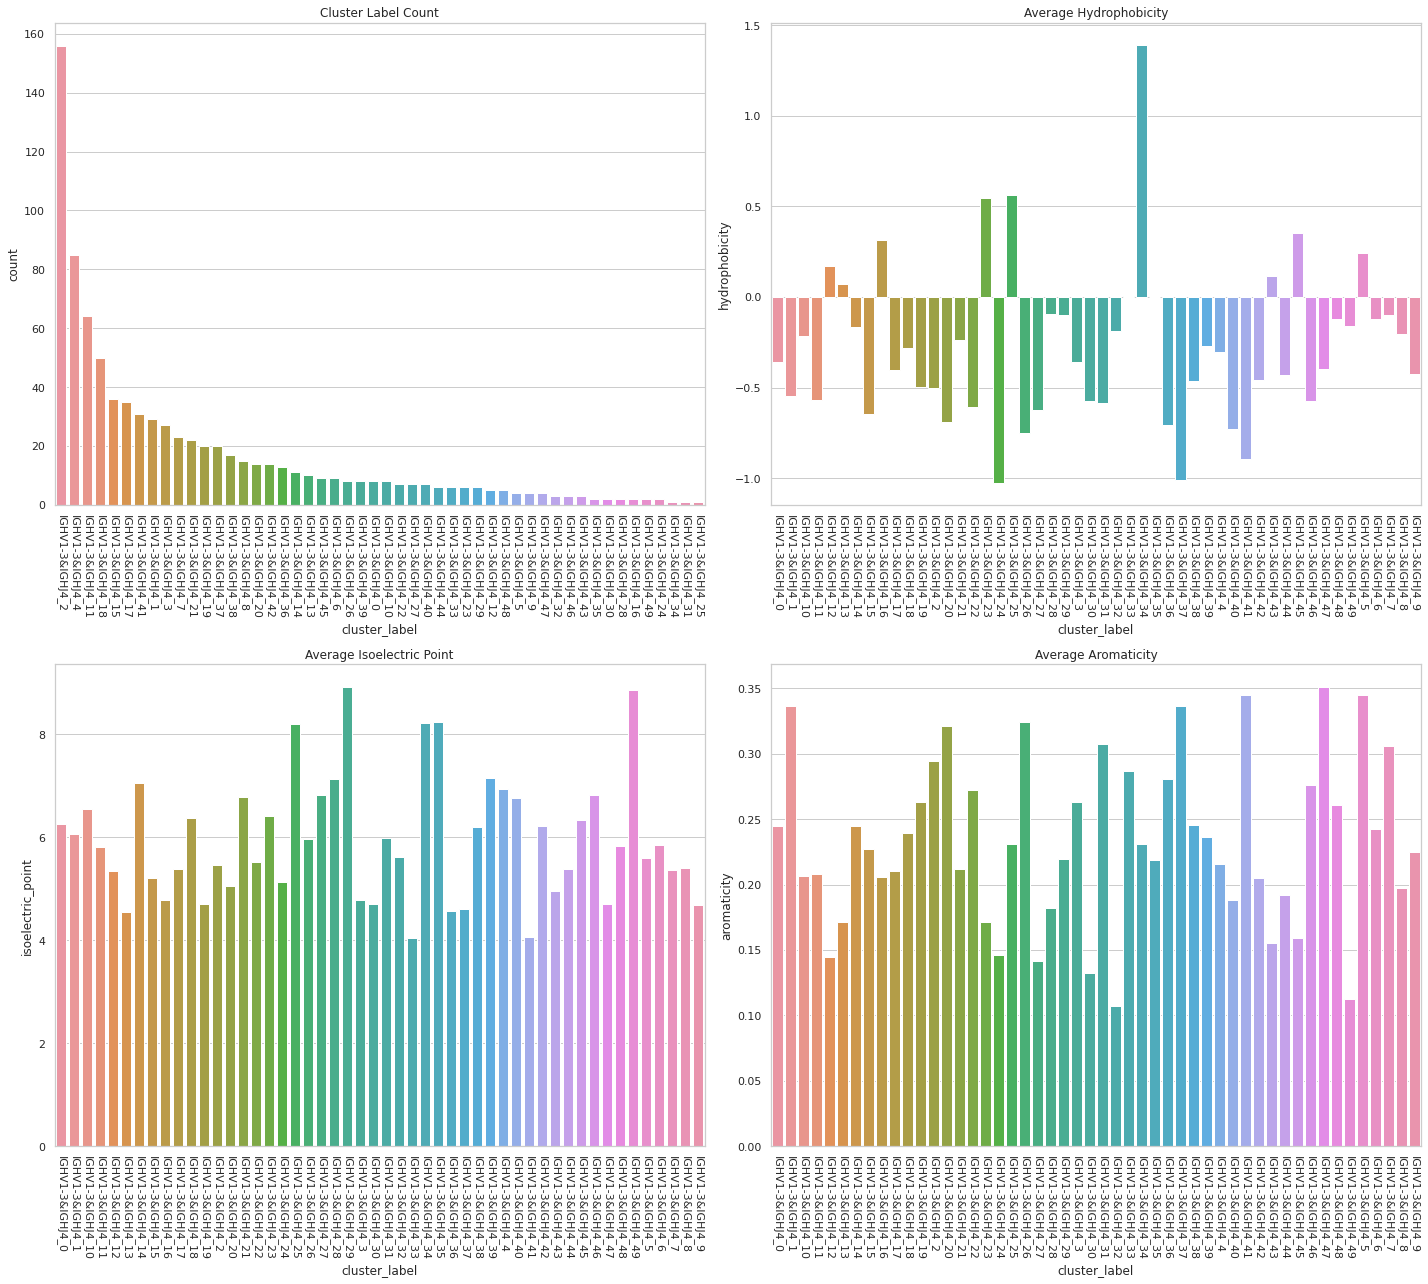

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 cluster_results 包含 'group_vj', 'cluster_label', 'hydrophobicity', 'isoelectric_point', 'aromaticity'

# 筛选特定 group_vj 值
specific_group = cluster_results[cluster_results['group_vj'] == 'IGHV1-3&IGHJ4']

# 按 cluster_label 分组并计算每组的平均理化属性
grouped = specific_group.groupby('cluster_label').agg({
    'hydrophobicity': 'mean',
    'isoelectric_point': 'mean',
    'aromaticity': 'mean'
}).reset_index()

# 计算 cluster_label 的计数
label_counts = specific_group['cluster_label'].value_counts().reset_index()
label_counts.columns = ['cluster_label', 'count']

# 设置绘图布局
plt.figure(figsize=(20, 18))  # 调整整体图形大小以适应四个子图

# 疏水性
plt.subplot(222)  # 2行2列的图形中的第1个
sns.barplot(x='cluster_label', y='hydrophobicity', data=grouped)
plt.title('Average Hydrophobicity')
plt.xticks(rotation=270)

# 等电点
plt.subplot(223)  # 2行2列的图形中的第2个
sns.barplot(x='cluster_label', y='isoelectric_point', data=grouped)
plt.title('Average Isoelectric Point')
plt.xticks(rotation=270)

# 芳香性
plt.subplot(224)  # 2行2列的图形中的第3个
sns.barplot(x='cluster_label', y='aromaticity', data=grouped)
plt.title('Average Aromaticity')
plt.xticks(rotation=270)

# cluster_label 计数
plt.subplot(221)  # 2行2列的图形中的第4个
sns.barplot(x='cluster_label', y='count', data=label_counts)
plt.title('Cluster Label Count')
plt.xticks(rotation=270)

# 调整布局
plt.tight_layout()
plt.savefig('/home/zengzw/tmp/figures/IGHV1-3&IGHJ4_properties.png')

# 显示图表
plt.show()


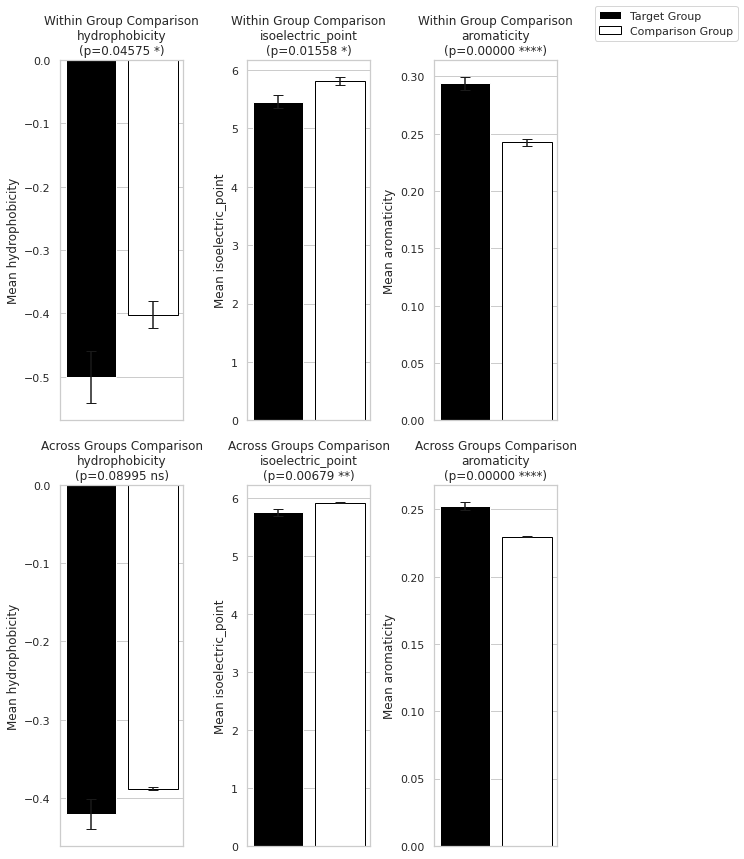

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def significance_marker(p_value):
    if p_value < 0.0001:
        return '****'
    elif p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'  # Not significant

def plot_property_comparison(ax, group1, group2, property_name, title, bar_width=0.2):
    # 计算均值和标准误
    mean1 = group1[property_name].mean()
    mean2 = group2[property_name].mean()
    sem1 = group1[property_name].sem()
    sem2 = group2[property_name].sem()
    
    # 进行t检验
    t_stat, p_value = ttest_ind(group1[property_name].dropna(), group2[property_name].dropna())
    stars = significance_marker(p_value)
    
    # 绘制条形图，黑色和白色条形
    labels = ['Target Group', 'Comparison Group']
    means = [mean1, mean2]
    errors = [sem1, sem2]
    x_positions = [0, bar_width + 0.25*bar_width]  # Ensure some spacing between the bars
    ax.bar(x_positions[0], means[0], yerr=errors[0], width=bar_width, capsize=5, color='black', label='Target Group')
    ax.bar(x_positions[1], means[1], yerr=errors[1], width=bar_width, capsize=5, color='white', edgecolor='black', label='Comparison Group')
    ax.set_title(f'{title}\n{property_name}\n(p={p_value:.5f} {stars})')
    ax.set_ylabel('Mean ' + property_name)
    ax.set_xticks([])  # Hide x-axis labels

# 准备数据
target_group = cluster_results[cluster_results['group_vj'] == 'IGHV1-3&IGHJ4']
other_group = cluster_results[cluster_results['group_vj'] != 'IGHV1-3&IGHJ4']

fig, axes = plt.subplots(2, 3, figsize=(8, 12))  # 2行3列

# 每个属性对应一列
properties = ['hydrophobicity', 'isoelectric_point', 'aromaticity']
for i, prop in enumerate(properties):
    # 第一行：特定标签与其他标签比较
    target_label_data = target_group[target_group['cluster_label'] == 'IGHV1-3&IGHJ4_2']
    other_label_data = target_group[target_group['cluster_label'] != 'IGHV1-3&IGHJ4_2']
    plot_property_comparison(axes[0, i], target_label_data, other_label_data, prop, 'Within Group Comparison', bar_width=0.1)
    
    # 第二行：特定组与其他组比较
    plot_property_comparison(axes[1, i], target_group, other_group, prop, 'Across Groups Comparison', bar_width=0.1)

plt.tight_layout()
# Set a global legend for the figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.savefig('/home/zengzw/tmp/figures/IGHV1-3&IGHJ4_2:t-test.png',bbox_inches='tight')
plt.show()


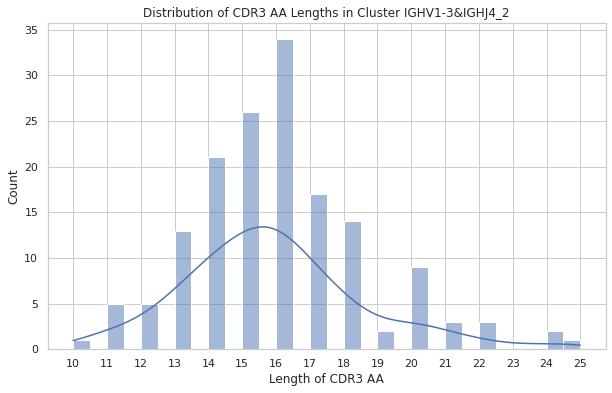

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经有了一个DataFrame 'cluster_results'，包含列 'cluster_label' 和 'cdr3_aa'

# 选择特定的cluster_label
specific_cluster = 'IGHV1-3&IGHJ4_2'  # 确保这是DataFrame中存在的一个cluster_label
sequences = cluster_results[cluster_results['cluster_label'] == specific_cluster]['cdr3_aa']

# 计算序列长度
sequence_lengths = sequences.apply(len)

# Setting up bin edges to only include integer lengths
min_length = sequence_lengths.min()
max_length = sequence_lengths.max()
bins = range(min_length, max_length + 1)  # '+2' to include the last integer value


# 使用seaborn绘制长度分布
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=30, kde=True)  # 使用histplot或distplot根据您的seaborn版本
plt.title('Distribution of CDR3 AA Lengths in Cluster {}'.format(specific_cluster))
plt.xlabel('Length of CDR3 AA')
plt.ylabel('Count')
plt.xticks(bins)  # Ensuring only integers are labeled on the x-axis
plt.savefig('/home/zengzw/tmp/figures/IGHV1-3&IGHJ4_2:len-distribution.png',bbox_inches='tight')
plt.show()


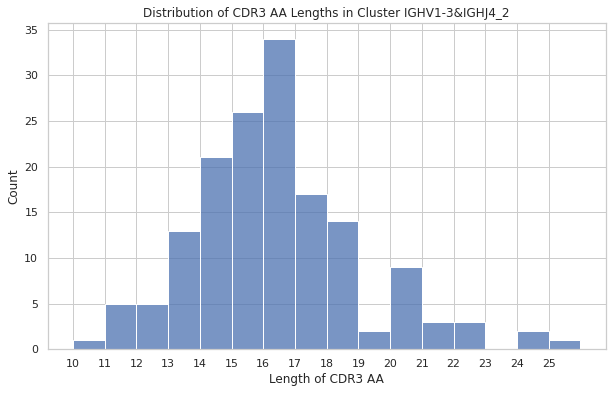

In [191]:
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import io
import weblogo
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame 'cluster_results' with columns 'cluster_label' and 'cdr3_aa'

# Selecting a specific cluster label
specific_cluster = 'IGHV1-3&IGHJ4_2'  # Ensure this cluster_label exists in your DataFrame
sequences = cluster_results[cluster_results['cluster_label'] == specific_cluster]['cdr3_aa']

# Calculate sequence lengths
sequence_lengths = sequences.apply(len)

# Find the most common sequence length
most_common_length = sequence_lengths.mode()[0]

# Filter out sequences of this length
filtered_sequences = sequences[sequence_lengths == most_common_length]

if filtered_sequences.empty:
    print("No sequences found at the most common length of {}.".format(most_common_length))
else:
    # Create a list of sequence records
    seq_records = [SeqRecord(Seq(seq), id=str(i)) for i, seq in enumerate(filtered_sequences)]

    # Convert sequence records to WebLogo-compatible format
    seqs = io.StringIO()
    SeqIO.write(seq_records, seqs, "fasta")
    seqs.seek(0)

    # Generate the logo
    logo_data = weblogo.LogoData.from_seqs(weblogo.read_seq_data(seqs))
    logo_options = weblogo.LogoOptions(title="WebLogo for Cluster " + specific_cluster)
    logo_format = weblogo.LogoFormat(logo_data, logo_options)
    
    # Save the logo in PNG format
    png = weblogo.png_print_formatter(logo_data, logo_format)
    with open('/home/zengzw/tmp/figures/' + specific_cluster + ':weblogo.png', 'wb') as f:
        f.write(png)


# Plotting the length distribution
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=range(int(sequence_lengths.min()), int(sequence_lengths.max()) + 2), kde=False)
plt.title('Distribution of CDR3 AA Lengths in Cluster {}'.format(specific_cluster))
plt.xlabel('Length of CDR3 AA')
plt.ylabel('Count')
plt.xticks(range(int(sequence_lengths.min()), int(sequence_lengths.max()) + 1))  # Ensuring only integers are labeled
plt.savefig('/home/zengzw/tmp/figures/'+ specific_cluster +':len-distribution.png', bbox_inches='tight')
plt.show()


In [194]:
cluster_results.loc[cluster_results['cluster_label']=='IGHV3-23&IGHJ4_0']['Sample'].value_counts()

UOC1-OC      59
PBMC6        28
PBMC5        24
ECO1-LN      21
TNBC6        21
             ..
TNBC3         1
GC03-Para     1
LABC8         1
HAS02         1
PBMC1         1
Name: Sample, Length: 63, dtype: int64

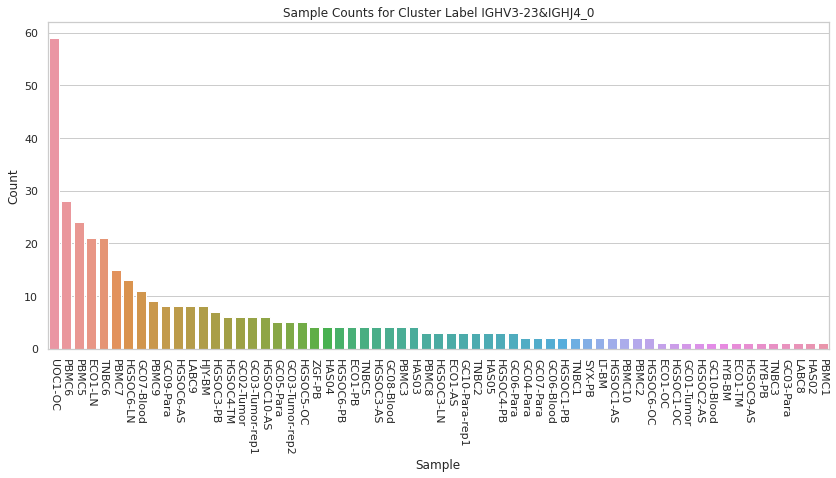

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选特定cluster_label的数据并计数
data_to_plot = cluster_results.loc[cluster_results['cluster_label'] == 'IGHV3-23&IGHJ4_0']['Sample'].value_counts().reset_index()
data_to_plot.columns = ['Sample', 'Count']

# 绘制条形图
plt.figure(figsize=(14, 6))  # 可以调整图像大小
sns.barplot(x='Sample', y='Count', data=data_to_plot)

# 设置x轴标签竖直显示
plt.xticks(rotation=270)  # 旋转90度

# 设置标签和标题
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Sample Counts for Cluster Label IGHV3-23&IGHJ4_0')

# 保存图像
plt.savefig('/home/zengzw/tmp/figures/IGHV3-23--IGHJ4/sample_counts_plot.png')  # 更改路径为你的保存路径

# 显示图像
plt.show()


In [195]:
cluster_results.loc[cluster_results['cluster_label']=='IGHV2-5&IGHJ6_15']['Sample'].value_counts()

GC08-Tumor-S2    27
GC08-Tumor-S1     9
GC07-Tumor        6
GC08-Para         5
GC07-Para         3
GC08-Blood        2
Name: Sample, dtype: int64

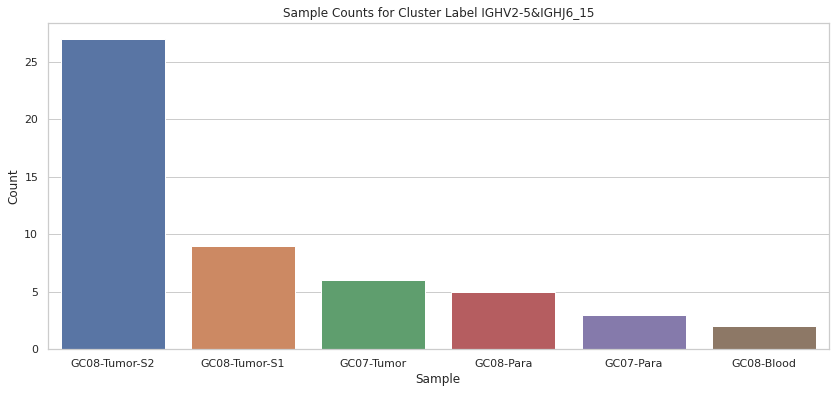

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

# 筛选特定cluster_label的数据并计数
data_to_plot = cluster_results.loc[cluster_results['cluster_label'] == 'IGHV2-5&IGHJ6_15']['Sample'].value_counts().reset_index()
data_to_plot.columns = ['Sample', 'Count']

# 绘制条形图
plt.figure(figsize=(14, 6))  # 可以调整图像大小
sns.barplot(x='Sample', y='Count', data=data_to_plot)

# 设置x轴标签竖直显示
plt.xticks(rotation=0)  # 旋转90度

# 设置标签和标题
plt.xlabel('Sample')
plt.ylabel('Count')
plt.title('Sample Counts for Cluster Label IGHV2-5&IGHJ6_15')

# 保存图像
plt.savefig('/home/zengzw/tmp/figures/IGHV2-5--IGHJ6/sample_counts_plot.png')  # 更改路径为你的保存路径

# 显示图像
plt.show()
